# Gambler's Problem

In [95]:
import random, numpy, pandas, matplotlib, os
import matplotlib.pyplot as plt

In [96]:
goal = 100
def arange(x, start = 0):
    return range(start, x+1)
    
states = arange(goal)
actions = arange(goal)

p_h = 0.4 #probability of heads

def actions_from_state(s, start = 1):
    return list(arange(min(s,100-s),start=1))

def weighted_children(s, a):
    if a == 0 or a > s or a > 100 - s:
        return None
    children = [
        (s + a, 1 if s + a == 100 else 0, p_h),  # win case
        (s - a, 0, 1 - p_h)                       # lose case
    ]
    return children

In [97]:
s=7
for a in actions_from_state(s):
    print(s,a,weighted_children(s,a))

7 1 [(8, 0, 0.4), (6, 0, 0.6)]
7 2 [(9, 0, 0.4), (5, 0, 0.6)]
7 3 [(10, 0, 0.4), (4, 0, 0.6)]
7 4 [(11, 0, 0.4), (3, 0, 0.6)]
7 5 [(12, 0, 0.4), (2, 0, 0.6)]
7 6 [(13, 0, 0.4), (1, 0, 0.6)]
7 7 [(14, 0, 0.4), (0, 0, 0.6)]


## Value Iteration

In [170]:
theta = 1e-50
done = False
V = [0 for s in states]
V[100] = 0
V[0] = 0
gamma = 0.75
pi = [ 0 for s in states ]

def reward(s):
    return 1 if s==100 else 0
    
while (not done):
    delta = 0
    for s in range(1,100):
        state_actions = actions_from_state(s)
        action_values = []
        v = V[s]
        for a in state_actions:
            action_values.append( (p_h*(reward(s+a)+gamma*V[s+a]) + (1-p_h)*(reward(s-a)+gamma*V[s-a]),a) )
        best_value = max(action_values, key=lambda x:(x[0],-(x[1])))[0]
        V[s] = best_value
        delta = max(delta, abs(v - V[s]))
    done = (delta < theta)
V[100]=0

In [171]:
V[2]

0.001106023892278299

In [172]:
pi = [0]*101
for s in range(1,100):
    state_actions = actions_from_state(s)
    action_values = []
    for a in state_actions:
        action_values.append( (p_h*(reward(s+a)+gamma*V[s+a]) + (1-p_h)*(reward(s-a)+gamma*V[s-a]),a) )
    best_action = max(action_values, key=lambda x:(x[0],-x[1]))[1]
    pi[s] = best_action

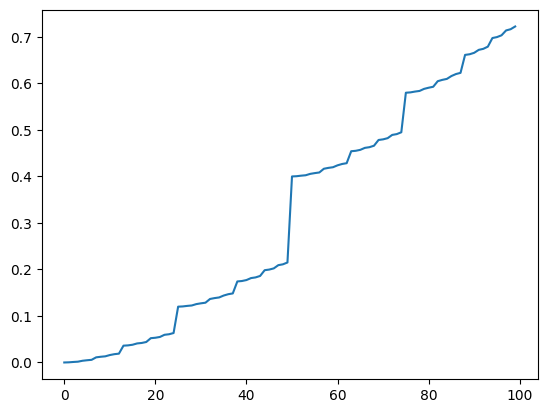

In [173]:
plt.plot(V[:-1])

<BarContainer object of 101 artists>

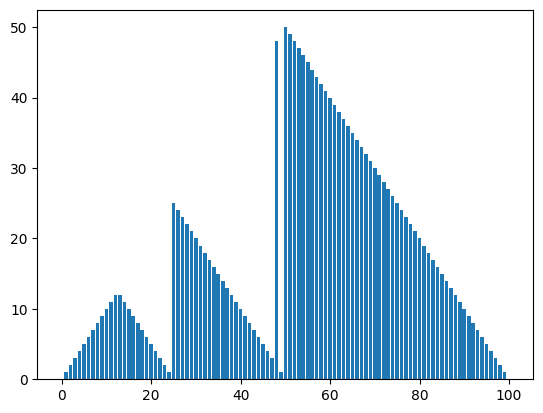

In [174]:
plt.bar(range(len(pi)),pi)

In [93]:
import numpy as np
import matplotlib.pyplot as plt

p_heads = .4
GAMMA = 1
rewards = np.zeros(101) #rewards for each state including 100
rewards[100] = 1

class value_iteration:
	def __init__(self):
		self.val_state = np.zeros(101, dtype=np.float128) #start_state is from 1 to 99 (0 and 100 are dummy)
		self.policy = np.zeros(100, dtype=np.float128) #policy for each state
	
	def bellman(self, state, action, val_state):
		return p_heads * (rewards[state + action] + GAMMA * val_state[state + action]) + (1 - p_heads) * (rewards[state - action] + GAMMA * val_state[state - action])

	def val_iteration(self, epsilon = 1e-20):
		while True:
			delta = 0
			for state in range(1,100): 
				v = self.val_state[state] 
				max_action = min(state, 100-state)
				val_action = np.zeros(max_action+1, dtype=np.float128)
				for action in range(1, max_action+1):
					val_action[action] = self.bellman(state, action, self.val_state) 
					#val is weighted val (by p_head) of next state value or 1 if reach 100
				self.val_state[state] = np.max(val_action)
				delta = max(delta, np.abs(self.val_state[state] - v)) #find maximum change over all states
			if delta < epsilon:
				break
		return self.policy_it()


	def policy_it(self):
		for state in range(1,100):
			max_action = min(state, 100-state)
			val_action = np.zeros(max_action+1)
			for action in range(1, max_action+1):
				val_action[action] = self.bellman(state, action, self.val_state)
			best_action = np.argmax(val_action)
			print(state, -np.sort(-val_action)[:2])
			self.policy[state] = best_action
		return self.val_state, self.policy


1 [0.00206562 0.        ]
2 [0.00516406 0.00492956]
3 [0.00922547 0.0082625 ]
4 [0.01291015 0.01248944]
5 [0.0173854  0.01697156]
6 [0.02306368 0.02155688]
7 [0.02781411 0.02733512]
8 [0.03227539 0.0317625 ]
9 [0.03768507 0.03690188]
10 [0.0434635  0.04278422]
11 [0.05035447 0.04914178]
12 [0.05765919 0.05630843]
13 [0.06523937 0.06523937]
14 [0.06953528 0.06953528]
15 [0.07443124 0.07443124]
16 [0.08068847 0.08068847]
17 [0.08661104 0.08661104]
18 [0.09421268 0.09421268]
19 [0.10314362 0.10314362]
20 [0.10865874 0.10865874]
21 [0.11596663 0.11596663]
22 [0.12588617 0.12588617]
23 [0.13357998 0.13357998]
24 [0.14414799 0.14414799]
25 [0.16       0.15172817]
26 [0.16309844 0.16309844]
27 [0.16774609 0.16774609]
28 [0.17383821 0.17383821]
29 [0.17936523 0.17936523]
30 [0.1860781 0.1860781]
31 [0.19459552 0.19459552]
32 [0.20172117 0.20172117]
33 [0.20841308 0.20841308]
34 [0.21652761 0.21652761]
35 [0.22519525 0.22519525]
36 [0.2355317 0.2355317]
37 [0.24648879 0.24648879]
38 [0.25785906

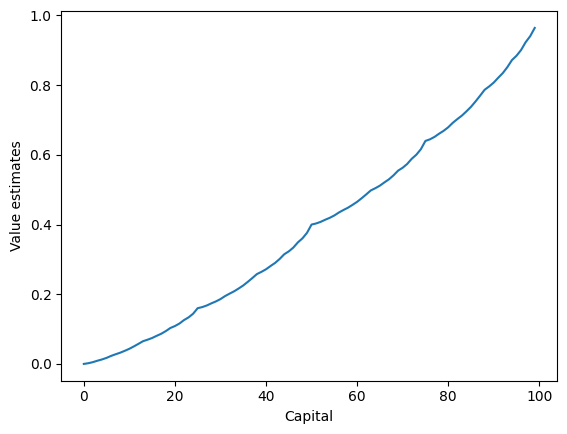

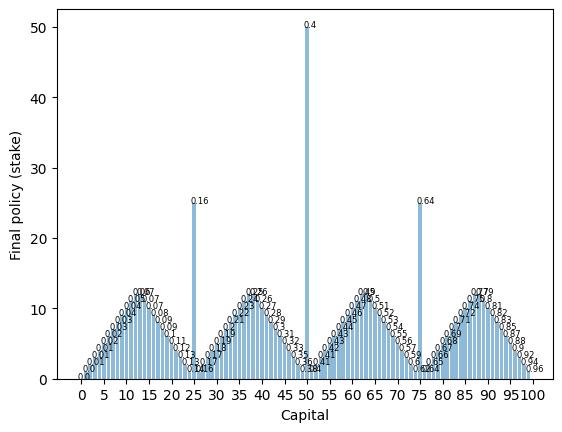

In [94]:
vi = value_iteration()
v, p = vi.val_iteration()

# pi = policy_iteration()
# v, p = pi.policy_evaluation()
# print(v)
# print(p)

plt.plot(range(100), v[:100])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

plt.bar(range(100), p, align = 'center', alpha = 0.5)
for i in range(100):
	plt.text(i - 0.75, p[i] + 0.01, str(round(v[i],2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final policy (stake)')
plt.show()

In [92]:
-np.sort(-v)[:2]

array([0.96433297, 0.94055495], dtype=float128)

In [402]:
V = np.array([float(x) for x in V])

In [403]:
V-v

array([0.        , 0.00104864, 0.00291285, 0.00491125, 0.00809032,
       0.01075171, 0.01364138, 0.01959155, 0.02245031, 0.02529328,
       0.02984175, 0.03421427, 0.03786851, 0.05176627, 0.05385209,
       0.05700645, 0.06179173, 0.06487069, 0.06968877, 0.07946098,
       0.08229071, 0.08653811, 0.09443456, 0.09825626, 0.10458512,
       0.128     , 0.12957296, 0.13236927, 0.13536687, 0.14013549,
       0.14412757, 0.14846207, 0.15738733, 0.16167547, 0.16593992,
       0.17276262, 0.1793214 , 0.18480277, 0.2056494 , 0.20877814,
       0.21350967, 0.22068759, 0.22530604, 0.23253316, 0.24719147,
       0.25143607, 0.25780717, 0.26965184, 0.27538439, 0.28487768,
       0.        , 0.00157296, 0.00436927, 0.00736687, 0.01213549,
       0.01612757, 0.02046207, 0.02938733, 0.03367547, 0.03793992,
       0.04476262, 0.0513214 , 0.05680277, 0.0776494 , 0.08077814,
       0.08550967, 0.09268759, 0.09730604, 0.10453316, 0.11919147,
       0.12343607, 0.12980717, 0.14165184, 0.14738439, 0.15687

In [410]:
import mpmath as mp
import random

# Set precision for mpmath
mp.mp.dps = 150  # set the decimal places for precision

# Problem setup
theta = mp.mpf('1e-20')
done = False
goal = 100
states = list(range(goal + 1))  # defining states from 0 to 100
V = [mp.mpf(random.random()) for s in states]
V[100] = mp.mpf(0)
V[0] = mp.mpf(0)
gamma = mp.mpf(1)
pi = [0 for s in states]

# Defining reward function
def reward(s):
    return mp.mpf(1) if s == 100 else mp.mpf(0)

# Placeholder for actions_from_state and weighted_children functions
def actions_from_state(s):
    return range(1, min(s, goal - s) + 1)  # valid betting actions

def weighted_children(s, a):
    return [(s + a, reward(s + a), mp.mpf('0.4')), (s - a, reward(s - a), mp.mpf('0.6'))]

# Value iteration loop
while not done:
    delta = mp.mpf(0)
    for s in range(1, 100):
        v = V[s]
        state_actions = actions_from_state(s)
        action_values = []
        for a in state_actions:
            action_values.append( (p_h*(reward(s+a)+gamma*V[s+a]) + (mp.mpf(1)-p_h)*(reward(s-a)+gamma*V[s-a]),a) )
        best_value = max(action_values, key=lambda x:x[0])[0]
        V[s] = best_value
        delta = max(delta, abs(v - V[s]))
    done = (delta < theta)

V[100] = mp.mpf(0)

# Output results
print("Value Estimates:")
print([float(v) for v in V])  # converting mpmath types to floats for easier reading


Value Estimates:
[0.0, 0.0020656247765443152, 0.005164061941360788, 0.009225471067793888, 0.01291015485340197, 0.01738539898132428, 0.02306367766948472, 0.02781411305627053, 0.032275387133504925, 0.037685072795366426, 0.0434634974533107, 0.05035446998069343, 0.05765919417371179, 0.06523937486592658, 0.06953528264067634, 0.07443123938879456, 0.08068846783376232, 0.08661104367721985, 0.09421268198841606, 0.10314362491955595, 0.10865874363327674, 0.11596662620633191, 0.12588617495173357, 0.13357997572379915, 0.14414798543427948, 0.16, 0.16309843716481648, 0.16774609291204118, 0.17383820660169083, 0.17936523228010295, 0.18607809847198642, 0.19459551650422707, 0.2017211695844058, 0.20841308070025738, 0.21652760919304964, 0.22519524617996606, 0.23553170497104015, 0.2464887912605677, 0.2578590622988899, 0.2643029239610145, 0.27164685908319186, 0.2810327017506435, 0.2899165655158298, 0.3013190229826241, 0.31471543737933394, 0.3229881154499151, 0.33394993930949785, 0.3488292624276004, 0.3603699

In [412]:
def fv(a):
    return [float(x[0]) for x in a]

In [415]:
my_v = V
the_v = v

In [416]:
pi = [0]*101
VV = my_v
p_h = mp.mpf('0.4')
gamma = mp.mpf(1)
for s in range(1,100):
    state_actions = actions_from_state(s)
    action_values = []
    the_action_values = []
    for a in state_actions:
        action_values.append( (p_h*(reward(s+a)+gamma*VV[s+a]) + (mp.mpf(1)-p_h)*(reward(s-a)+gamma*VV[s-a]),a) )
        the_action_values.append( (p_h*(reward(s+a)+gamma*the_v[s+a]) + (mp.mpf(1)-p_h)*(reward(s-a)+gamma*the_v[s-a]),a) )
    best_action = max(action_values, key=lambda x:x[0])[1]
    difference = np.array(fv(action_values)) - np.array(fv(the_action_values))
    print(s, np.max(difference))
    pi[s] = best_action

TypeError: 'mpf' object is not subscriptable

<BarContainer object of 101 artists>

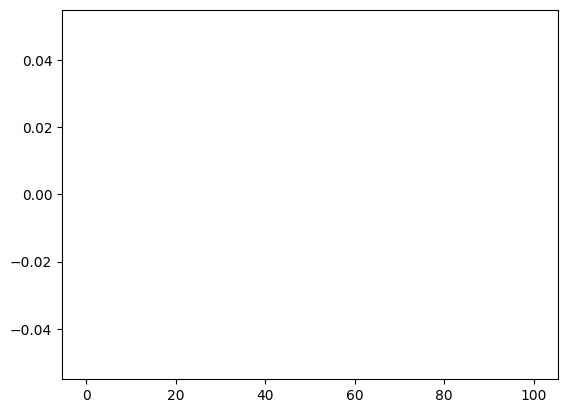

In [408]:
plt.bar(range(len(pi)),pi)

In [409]:
mp.mpf('0.4')

mpf('0.399999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999992')

In [81]:
import numpy as np

# Check properties of np.float128
print(np.finfo(np.float128))


Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
smallest_normal = 3.3621031431120935063e-4932   smallest_subnormal = 4e-4951
---------------------------------------------------------------



In [82]:
import numpy as np

# Check properties of np.float64
print(np.finfo(np.float64))


Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



In [83]:
import sys
import math

print("Float information (sys.float_info):")
print(sys.float_info)

print("\nSmallest positive float (math.ulp(0.0)):")
print(math.ulp(0.0))  # Smallest amount by which two floating-point numbers can differ


Float information (sys.float_info):
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Smallest positive float (math.ulp(0.0)):
5e-324
